In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('initiate').getOrCreate()

In [2]:
from pyspark.sql.functions import isnull, col, count, when, expr

In [3]:
from pyspark.ml.classification import LogisticRegression

In [4]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

In [5]:
from pyspark.ml import Pipeline

In [6]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [7]:
from pyspark.ml.regression import LinearRegression

In [8]:
from pyspark.sql.types import DoubleType, IntegerType

In [9]:
from pyspark.sql.functions import monotonically_increasing_id

In [10]:
prod_df = spark.read.csv('Iteration 4/Production.csv', inferSchema=True, header=True)
prod_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- State_Name: string (nullable = true)
 |-- District_Name: string (nullable = true)
 |-- Crop_Year: integer (nullable = true)
 |-- Season: string (nullable = true)
 |-- Crop: string (nullable = true)
 |-- Area: integer (nullable = true)
 |-- Production: integer (nullable = true)



In [11]:
prod_df.show()

+---+--------------+-------------+---------+------+------------+-----+----------+
| ID|    State_Name|District_Name|Crop_Year|Season|        Crop| Area|Production|
+---+--------------+-------------+---------+------+------------+-----+----------+
|  1|Andhra Pradesh|    ANANTAPUR|     1997|Kharif|Cotton(lint)| 7300|      9400|
|  2|Andhra Pradesh|    ANANTAPUR|     1998|Kharif|Cotton(lint)|14000|     12900|
|  3|Andhra Pradesh|    ANANTAPUR|     1999|Kharif|Cotton(lint)| 9453|     10510|
|  4|Andhra Pradesh|    ANANTAPUR|     2000|Kharif|Cotton(lint)|12025|     16128|
|  5|Andhra Pradesh|    ANANTAPUR|     2001|Kharif|Cotton(lint)| 8552|      9055|
|  6|Andhra Pradesh|    ANANTAPUR|     2002|Kharif|Cotton(lint)| 7638|      7144|
|  7|Andhra Pradesh|    ANANTAPUR|     2003|Kharif|Cotton(lint)| 4212|      4262|
|  8|Andhra Pradesh|    ANANTAPUR|     2004|Kharif|Cotton(lint)| 8933|      7041|
|  9|Andhra Pradesh|    ANANTAPUR|     2005|Kharif|Cotton(lint)| 3295|      3450|
| 10|Andhra Prad

In [12]:
rain_df = spark.read.csv('Iteration 4/Rainfall.csv', inferSchema=True, header=True)
rain_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- State_Name: string (nullable = true)
 |-- District_Name: string (nullable = true)
 |-- Crop_Year: integer (nullable = true)
 |-- rainfall: double (nullable = true)



In [13]:
rain_df.show()

+---+--------------+-------------+---------+--------+
| ID|    State_Name|District_Name|Crop_Year|rainfall|
+---+--------------+-------------+---------+--------+
|  1|Andhra Pradesh|    ANANTAPUR|     1997|   683.2|
|  2|Andhra Pradesh|    ANANTAPUR|     1998|   900.4|
|  3|Andhra Pradesh|    ANANTAPUR|     1999|   582.2|
|  4|Andhra Pradesh|    ANANTAPUR|     2000|   638.1|
|  5|Andhra Pradesh|    ANANTAPUR|     2001|   676.9|
|  6|Andhra Pradesh|    ANANTAPUR|     2002|   468.6|
|  7|Andhra Pradesh|    ANANTAPUR|     2003|   782.5|
|  8|Andhra Pradesh|    ANANTAPUR|     2004|   566.7|
|  9|Andhra Pradesh|    ANANTAPUR|     2005|   953.5|
| 10|Andhra Pradesh|    ANANTAPUR|     2006|   816.0|
| 11|Andhra Pradesh|    ANANTAPUR|     2007|   760.2|
| 12|Andhra Pradesh|    ANANTAPUR|     2008|   703.1|
| 13|Andhra Pradesh|    ANANTAPUR|     2009|   548.9|
| 14|Andhra Pradesh|    ANANTAPUR|     2010|  1002.0|
| 15|Andhra Pradesh|    ANANTAPUR|     2011|   616.1|
| 16|Andhra Pradesh|    ANAN

In [14]:
prod_df.head(1)

[Row(ID=1, State_Name='Andhra Pradesh', District_Name='ANANTAPUR', Crop_Year=1997, Season='Kharif', Crop='Cotton(lint)', Area=7300, Production=9400)]

In [15]:
rain_df.head(1)

[Row(ID=1, State_Name='Andhra Pradesh', District_Name='ANANTAPUR', Crop_Year=1997, rainfall=683.2)]

In [16]:
prod_df.filter( (prod_df['State_Name'] == "Andhra Pradesh") ).select('State_Name','Season').distinct().show()

+--------------+------+
|    State_Name|Season|
+--------------+------+
|Andhra Pradesh|Kharif|
|Andhra Pradesh|  Rabi|
+--------------+------+



In [17]:
prod_df.filter( (prod_df['State_Name'] == "Karnataka") ).select('State_Name','Season').distinct().show()

+----------+----------+
|State_Name|    Season|
+----------+----------+
| Karnataka|    Kharif|
| Karnataka|Whole Year|
| Karnataka|      Rabi|
| Karnataka|    Summer|
+----------+----------+



In [18]:
prod_df.filter( (prod_df['State_Name'] == "Manipur") ).select('State_Name','Season').distinct().show()

+----------+------+
|State_Name|Season|
+----------+------+
|   Manipur|Winter|
|   Manipur|Autumn|
|   Manipur|  Rabi|
|   Manipur|Kharif|
+----------+------+



In [19]:
prod_df.filter( (prod_df['State_Name'] == "Meghalaya") ).select('State_Name','Season').distinct().show()

+----------+------+
|State_Name|Season|
+----------+------+
| Meghalaya|  Rabi|
| Meghalaya|Kharif|
+----------+------+



In [20]:
prod_df.filter( (prod_df['State_Name'] == "Tamil Nadu") ).select('State_Name','Season').distinct().show()

+----------+----------+
|State_Name|    Season|
+----------+----------+
|Tamil Nadu|      Rabi|
|Tamil Nadu|    Kharif|
|Tamil Nadu|Whole Year|
+----------+----------+



In [21]:
prod_df.select("Crop_Year").show()

+---------+
|Crop_Year|
+---------+
|     1997|
|     1998|
|     1999|
|     2000|
|     2001|
|     2002|
|     2003|
|     2004|
|     2005|
|     2006|
|     2007|
|     2008|
|     2009|
|     2010|
|     2011|
|     2012|
|     2012|
|     2013|
|     2013|
|     2014|
+---------+
only showing top 20 rows



In [22]:
prod_df_summary = prod_df.groupBy("Crop_Year").mean().select(['Crop_Year','avg(Production)'])
prod_df_summary.orderBy('Crop_Year').show()

+---------+------------------+
|Crop_Year|   avg(Production)|
+---------+------------------+
|     1997|           27964.5|
|     1998|28073.484848484848|
|     1999|23154.415384615386|
|     2000|28244.861538461537|
|     2001|24275.723076923077|
|     2002|13089.338709677419|
|     2003|19461.532258064515|
|     2004|29632.322580645163|
|     2005|         22746.875|
|     2006| 23080.06349206349|
|     2007|30494.365079365078|
|     2008| 32472.14285714286|
|     2009| 27740.18181818182|
|     2010|27549.060975609755|
|     2011|23609.904761904763|
|     2012|31676.644444444446|
|     2013|37733.747899159665|
|     2014| 74612.44117647059|
+---------+------------------+



In [23]:
rain_df.count()

1048542

In [24]:
rain_df.dropna().count()

1032

In [25]:
rain_df.filter((col("rainfall").isNull())).show()

+---+----------+-------------+---------+--------+
| ID|State_Name|District_Name|Crop_Year|rainfall|
+---+----------+-------------+---------+--------+
|253| Karnataka|     BAGALKOT|     2005|    null|
|254| Karnataka|     BAGALKOT|     2006|    null|
|255| Karnataka|     BAGALKOT|     2007|    null|
|256| Karnataka|     BAGALKOT|     2008|    null|
|257| Karnataka|     BAGALKOT|     2009|    null|
|277| Karnataka|      BELGAUM|     2005|    null|
|278| Karnataka|      BELGAUM|     2006|    null|
|279| Karnataka|      BELGAUM|     2007|    null|
|280| Karnataka|      BELGAUM|     2008|    null|
|281| Karnataka|      BELGAUM|     2009|    null|
|301| Karnataka|      BELLARY|     2005|    null|
|302| Karnataka|      BELLARY|     2006|    null|
|303| Karnataka|      BELLARY|     2007|    null|
|304| Karnataka|      BELLARY|     2008|    null|
|305| Karnataka|      BELLARY|     2009|    null|
|326| Karnataka|        BIDAR|     2005|    null|
|327| Karnataka|        BIDAR|     2006|    null|


In [26]:
columns_to_drop = ['State_Name', 'District_Name', 'Crop_Year']
rain_df_formatted = rain_df.drop(*columns_to_drop)

In [27]:
rain_df_formatted.show(5, True)

+---+--------+
| ID|rainfall|
+---+--------+
|  1|   683.2|
|  2|   900.4|
|  3|   582.2|
|  4|   638.1|
|  5|   676.9|
+---+--------+
only showing top 5 rows



In [28]:
rain_df_formatted.count()

1048542

In [29]:
state_num_df = (prod_df.select("State_Name").distinct()
  .orderBy("State_Name")
  .withColumn("State_Number", monotonically_increasing_id()))


In [30]:
prod_new_df = prod_df.join(state_num_df, "State_Name", "outer")

In [31]:
prod_new_df.filter( (prod_new_df['State_Name'] == "Meghalaya") ).select('Crop_Year', 'State_Number').show()

+---------+------------+
|Crop_Year|State_Number|
+---------+------------+
|     1997| 25769803776|
|     1998| 25769803776|
|     1999| 25769803776|
|     2000| 25769803776|
|     2001| 25769803776|
|     2002| 25769803776|
|     2003| 25769803776|
|     2004| 25769803776|
|     2005| 25769803776|
|     2006| 25769803776|
|     2007| 25769803776|
|     2008| 25769803776|
|     2009| 25769803776|
|     2010| 25769803776|
|     2011| 25769803776|
|     2012| 25769803776|
|     2013| 25769803776|
|     2014| 25769803776|
|     2013| 25769803776|
|     2014| 25769803776|
+---------+------------+
only showing top 20 rows



In [32]:
dist_num_df = (prod_new_df.select("District_Name").distinct()
  .orderBy("District_Name")
  .withColumn("District_Number", monotonically_increasing_id()))

In [33]:
prod_new_df = prod_new_df.join(dist_num_df, "District_Name", "outer")

In [34]:
season_df = (prod_new_df.select("Season").distinct()
  .orderBy("Season")
  .withColumn("Season_Number", monotonically_increasing_id()))

In [35]:
prod_new_df = prod_new_df.join(season_df, "Season", "outer")

In [36]:
prod_new_df.show()

+------+---------------+--------------+----+---------+------------+----+----------+------------+---------------+-------------+
|Season|  District_Name|    State_Name|  ID|Crop_Year|        Crop|Area|Production|State_Number|District_Number|Season_Number|
+------+---------------+--------------+----+---------+------------+----+----------+------------+---------------+-------------+
|  Rabi|   CHIKBALLAPUR|     Karnataka| 382|     2010|Cotton(lint)| 134|       291|  8589934592|    77309411328|  17179869184|
|  Rabi|   CHIKBALLAPUR|     Karnataka| 384|     2011|Cotton(lint)|  60|       113|  8589934592|    77309411328|  17179869184|
|  Rabi|         GUNTUR|Andhra Pradesh|  72|     2014|Cotton(lint)|  22|       115|           0|   223338299392|  17179869184|
|  Rabi| CHAMARAJANAGAR|     Karnataka| 374|     2010|Cotton(lint)|  45|        98|  8589934592|    68719476736|  17179869184|
|  Rabi| CHAMARAJANAGAR|     Karnataka| 376|     2011|Cotton(lint)|  60|       113|  8589934592|    68719476736

In [37]:
columns_for_drop = ['State_Name', 'District_Name', 'Season']
prod_df_formatted = prod_new_df.drop(*columns_for_drop)

In [38]:
prod_df_formatted.show()

+----+---------+------------+----+----------+------------+---------------+-------------+
|  ID|Crop_Year|        Crop|Area|Production|State_Number|District_Number|Season_Number|
+----+---------+------------+----+----------+------------+---------------+-------------+
| 382|     2010|Cotton(lint)| 134|       291|  8589934592|    77309411328|  17179869184|
| 384|     2011|Cotton(lint)|  60|       113|  8589934592|    77309411328|  17179869184|
|  72|     2014|Cotton(lint)|  22|       115|           0|   223338299392|  17179869184|
| 374|     2010|Cotton(lint)|  45|        98|  8589934592|    68719476736|  17179869184|
| 376|     2011|Cotton(lint)|  60|       113|  8589934592|    68719476736|  17179869184|
|1147|     2011|Cotton(lint)| 317|       872| 34359738368|   549755813888|  17179869184|
|1150|     2013|Cotton(lint)| 190|       594| 34359738368|   549755813888|  17179869184|
|1006|     2011|Cotton(lint)|   1|         3| 34359738368|   412316860416|  17179869184|
|1009|     2013|Cotto

In [39]:
target_df = prod_df_formatted.join(rain_df_formatted, "ID", "outer")
target_df.show()

+----+---------+------------+-----+----------+------------+---------------+-------------+--------+
|  ID|Crop_Year|        Crop| Area|Production|State_Number|District_Number|Season_Number|rainfall|
+----+---------+------------+-----+----------+------------+---------------+-------------+--------+
| 148|     2012|Cotton(lint)|63206|    195939|           0|   403726925824|   8589934592|   829.6|
| 463|     2006|Cotton(lint)|74021|     85558|  8589934592|   163208757248|  34359738368|    null|
| 471|     2012|Cotton(lint)|24211|     35040|  8589934592|   163208757248|   8589934592|   384.4|
| 496|     2013|Cotton(lint)|32535|     59632|  8589934592|   206158430208|  17179869184|    40.0|
| 833|     2004|Cotton(lint)| 3703|      6173| 34359738368|   171798691840|   8589934592|   663.1|
|1088|     2010|Cotton(lint)|    5|         9| 34359738368|   515396075520|   8589934592|   443.5|
|1238|     2000|Cotton(lint)|11442|     23259| 34359738368|   618475290624|   8589934592|   472.0|
| 243|    

In [40]:
target_df.filter( (target_df['ID'] == 1272) ).select('ID', 'State_Number', 'District_Number', 'Crop_Year','Season_Number', 'Area', 'Production', 'rainfall').show()

+----+------------+---------------+---------+-------------+----+----------+--------+
|  ID|State_Number|District_Number|Crop_Year|Season_Number|Area|Production|rainfall|
+----+------------+---------------+---------+-------------+----+----------+--------+
|1272| 34359738368|   627065225216|     2013|  17179869184|5904|     14203|   250.6|
+----+------------+---------------+---------+-------------+----+----------+--------+



In [41]:
prod_df_format = prod_df_formatted.drop("Crop")
prod_df_format.show(5, True)

+---+---------+----+----------+------------+---------------+-------------+
| ID|Crop_Year|Area|Production|State_Number|District_Number|Season_Number|
+---+---------+----+----------+------------+---------------+-------------+
|382|     2010| 134|       291|  8589934592|    77309411328|  17179869184|
|384|     2011|  60|       113|  8589934592|    77309411328|  17179869184|
| 72|     2014|  22|       115|           0|   223338299392|  17179869184|
|374|     2010|  45|        98|  8589934592|    68719476736|  17179869184|
|376|     2011|  60|       113|  8589934592|    68719476736|  17179869184|
+---+---------+----+----------+------------+---------------+-------------+
only showing top 5 rows



In [42]:
target_df.filter((col("rainfall").isNull())).show(5, True)

+----+---------+------------+-----+----------+------------+---------------+-------------+--------+
|  ID|Crop_Year|        Crop| Area|Production|State_Number|District_Number|Season_Number|rainfall|
+----+---------+------------+-----+----------+------------+---------------+-------------+--------+
| 463|     2006|Cotton(lint)|74021|     85558|  8589934592|   163208757248|  34359738368|    null|
| 540|     2005|Cotton(lint)|59771|     96519|  8589934592|   240518168576|  34359738368|    null|
| 897|     2009|Cotton(lint)|   74|       193| 34359738368|   283467841536|  34359738368|    null|
|1127|     2009|Cotton(lint)|  469|       996| 34359738368|   541165879296|  34359738368|    null|
|1143|     2008|Cotton(lint)|10976|      5338| 34359738368|   549755813888|  34359738368|    null|
+----+---------+------------+-----+----------+------------+---------------+-------------+--------+
only showing top 5 rows



In [43]:
target_df.count()

1048542

In [44]:
non_null_target_df = target_df.na.drop()

In [45]:
non_null_target_df.count()

1032

In [46]:
column_to_drop = ['ID', 'Crop']
new_df = non_null_target_df.drop(*column_to_drop)

In [47]:
new_df.show(5, True)

+---------+-----+----------+------------+---------------+-------------+--------+
|Crop_Year| Area|Production|State_Number|District_Number|Season_Number|rainfall|
+---------+-----+----------+------------+---------------+-------------+--------+
|     2012|63206|    195939|           0|   403726925824|   8589934592|   829.6|
|     2012|24211|     35040|  8589934592|   163208757248|   8589934592|   384.4|
|     2013|32535|     59632|  8589934592|   206158430208|  17179869184|    40.0|
|     2004| 3703|      6173| 34359738368|   171798691840|   8589934592|   663.1|
|     2010|    5|         9| 34359738368|   515396075520|   8589934592|   443.5|
+---------+-----+----------+------------+---------------+-------------+--------+
only showing top 5 rows



In [48]:
prod_df_format_new = prod_df_format.withColumn("tonnes_per_hectare", expr("(Production/Area)*10"))

In [49]:
prod_df_format_new.show(5, True)

+---+---------+----+----------+------------+---------------+-------------+------------------+
| ID|Crop_Year|Area|Production|State_Number|District_Number|Season_Number|tonnes_per_hectare|
+---+---------+----+----------+------------+---------------+-------------+------------------+
|382|     2010| 134|       291|  8589934592|    77309411328|  17179869184| 21.71641791044776|
|384|     2011|  60|       113|  8589934592|    77309411328|  17179869184|18.833333333333332|
| 72|     2014|  22|       115|           0|   223338299392|  17179869184| 52.27272727272727|
|374|     2010|  45|        98|  8589934592|    68719476736|  17179869184|21.777777777777775|
|376|     2011|  60|       113|  8589934592|    68719476736|  17179869184|18.833333333333332|
+---+---------+----+----------+------------+---------------+-------------+------------------+
only showing top 5 rows



In [50]:
prod_df_format_new.filter( (prod_df_format_new['tonnes_per_hectare'] > 60) ).select('State_Number').distinct().show()

+------------+
|State_Number|
+------------+
| 34359738368|
+------------+



In [51]:
prod_df_drop = prod_df_format_new.drop("tonnes_per_hectare")
prod_df_drop.show(5, True)

+---+---------+----+----------+------------+---------------+-------------+
| ID|Crop_Year|Area|Production|State_Number|District_Number|Season_Number|
+---+---------+----+----------+------------+---------------+-------------+
|382|     2010| 134|       291|  8589934592|    77309411328|  17179869184|
|384|     2011|  60|       113|  8589934592|    77309411328|  17179869184|
| 72|     2014|  22|       115|           0|   223338299392|  17179869184|
|374|     2010|  45|        98|  8589934592|    68719476736|  17179869184|
|376|     2011|  60|       113|  8589934592|    68719476736|  17179869184|
+---+---------+----+----------+------------+---------------+-------------+
only showing top 5 rows



In [52]:
new_df.toPandas().to_csv('mycsvv.csv')

In [53]:
new_df.dropDuplicates().count()

1032

In [54]:
new_df.describe().show()

+-------+------------------+------------------+------------------+--------------------+--------------------+--------------------+-----------------+
|summary|         Crop_Year|              Area|        Production|        State_Number|     District_Number|       Season_Number|         rainfall|
+-------+------------------+------------------+------------------+--------------------+--------------------+--------------------+-----------------+
|  count|              1032|              1032|              1032|                1032|                1032|                1032|             1032|
|   mean|2006.4176356589148|15504.880813953489|32031.662790697676|1.689686746294573...|3.329515248203410...|1.014644405779845E10|  559.10867248062|
| stddev|5.5566039764171595|30288.195652336886| 86824.12243110091|1.434899175642823...|2.009121454146099E11| 3.905420930052156E9|361.4478358835067|
|    min|              1997|                 1|                 1|                   0|                   0|    

In [55]:
new_df.stat.cov('Production', 'Area')

2323474799.939403

In [56]:
new_df.stat.cov('Production', 'rainfall')

1027422.2129175805

In [57]:
new_df.stat.cov('Production', 'Crop_Year')

38812.61429409277

In [58]:
new_df.stat.cov('Production', 'Production')

7538428235.930799

In [59]:
new_df.stat.corr('Production', 'Area')

0.8835358218175439

In [60]:
new_df.stat.corr('Production', 'rainfall')

0.0327388122796736

In [61]:
new_df.stat.corr('Production', 'Crop_Year')

0.08044944431097117

In [62]:
new_df.stat.corr('Production', 'Production')

1.0

In [63]:
new_df.show()

+---------+-----+----------+------------+---------------+-------------+--------+
|Crop_Year| Area|Production|State_Number|District_Number|Season_Number|rainfall|
+---------+-----+----------+------------+---------------+-------------+--------+
|     2012|63206|    195939|           0|   403726925824|   8589934592|   829.6|
|     2012|24211|     35040|  8589934592|   163208757248|   8589934592|   384.4|
|     2013|32535|     59632|  8589934592|   206158430208|  17179869184|    40.0|
|     2004| 3703|      6173| 34359738368|   171798691840|   8589934592|   663.1|
|     2010|    5|         9| 34359738368|   515396075520|   8589934592|   443.5|
|     2000|11442|     23259| 34359738368|   618475290624|   8589934592|   472.0|
|     2012| 6425|     21732|           0|   661424963584|   8589934592|   829.6|
|     2001| 1537|      1271|  8589934592|    85899345920|   8589934592|   632.8|
|     2010|  280|       657|  8589934592|   420906795008|  17179869184|   101.2|
|     2011|  190|       179|

In [64]:
new_df.printSchema()

root
 |-- Crop_Year: integer (nullable = true)
 |-- Area: integer (nullable = true)
 |-- Production: integer (nullable = true)
 |-- State_Number: long (nullable = true)
 |-- District_Number: long (nullable = true)
 |-- Season_Number: long (nullable = true)
 |-- rainfall: double (nullable = true)



In [65]:
assembler = VectorAssembler(
    inputCols=["Crop_Year", "Area", "State_Number", "District_Number", 
               "Season_Number","rainfall"],
    outputCol="features")

In [66]:
output = assembler.transform(new_df)

In [67]:
output.printSchema()

root
 |-- Crop_Year: integer (nullable = true)
 |-- Area: integer (nullable = true)
 |-- Production: integer (nullable = true)
 |-- State_Number: long (nullable = true)
 |-- District_Number: long (nullable = true)
 |-- Season_Number: long (nullable = true)
 |-- rainfall: double (nullable = true)
 |-- features: vector (nullable = true)



In [68]:
final_data = output.select("features",'Production')
final_data.show()

+--------------------+----------+
|            features|Production|
+--------------------+----------+
|[2012.0,63206.0,0...|    195939|
|[2012.0,24211.0,8...|     35040|
|[2013.0,32535.0,8...|     59632|
|[2004.0,3703.0,3....|      6173|
|[2010.0,5.0,3.435...|         9|
|[2000.0,11442.0,3...|     23259|
|[2012.0,6425.0,0....|     21732|
|[2001.0,1537.0,8....|      1271|
|[2010.0,280.0,8.5...|       657|
|[2011.0,190.0,2.5...|       179|
|[2010.0,1347.0,3....|      4552|
|[2011.0,2040.0,3....|      4369|
|[2000.0,5.0,3.435...|         5|
|[2012.0,226.0,0.0...|       288|
|[1998.0,5225.0,8....|      5688|
|[2004.0,2715.0,3....|      3812|
|[2012.0,8209.0,3....|     11859|
|[2009.0,12614.0,0...|     17882|
|[2001.0,37624.0,0...|     62633|
|[2003.0,3226.0,8....|      6374|
+--------------------+----------+
only showing top 20 rows



In [69]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [70]:
train_data.describe().show()


test_data.describe().show()

+-------+-----------------+
|summary|       Production|
+-------+-----------------+
|  count|              721|
|   mean|33963.49375866852|
| stddev|91521.99458654903|
|    min|                1|
|    max|          1075856|
+-------+-----------------+

+-------+-----------------+
|summary|       Production|
+-------+-----------------+
|  count|              311|
|   mean|27553.04501607717|
| stddev|74752.76155997936|
|    min|                2|
|    max|           809620|
+-------+-----------------+



In [71]:
lr = LinearRegression(labelCol='Production')

In [72]:
lrModel = lr.fit(train_data)

In [73]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [2156.3627634602885,2.5822994007541653,2.0907270167209953e-07,1.3675810851529412e-08,-4.973008416789077e-07,1.6706506031516337] Intercept: -4338412.386963765


In [74]:
test_results = lrModel.evaluate(test_data)

In [75]:
test_results.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|   7240.59049737826|
|-22867.534033630043|
| -4209.037870805711|
|  20148.23733459972|
| 2324.3995493128896|
|-21792.300207751803|
|  7835.923187342472|
| -8580.997503784485|
|  7004.010351749137|
| -76657.53670782503|
|-3463.0038948869333|
|-13373.301742211916|
|  8657.069320950657|
|  4563.376616310328|
| -7526.470204456709|
|  25002.22180551663|
| -53878.96629600972|
| 5536.5452800393105|
|  9060.760330503806|
| 13336.751443934627|
+-------------------+
only showing top 20 rows



In [76]:
print("RSME: {}".format(test_results.rootMeanSquaredError))

RSME: 26802.787150968386


In [77]:
print("R2: {}".format(test_results.r2))

R2: 0.8710254183888111


In [78]:
final_data.describe().show()

+-------+------------------+
|summary|        Production|
+-------+------------------+
|  count|              1032|
|   mean|32031.662790697676|
| stddev| 86824.12243110091|
|    min|                 1|
|    max|           1075856|
+-------+------------------+



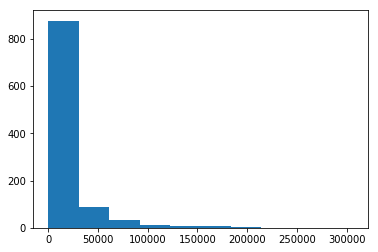

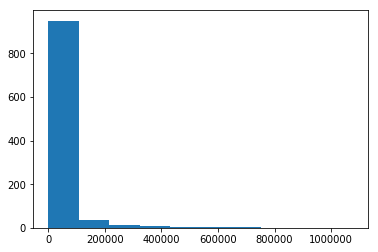

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Convert area to an array using Numpy and plot it using pyplot. 
areaArr = np.array(new_df.select('Area').collect())
plt.hist(areaArr)
plt.show()

# Because you can interact with Spark using SQL, you can also filter the data you see. 
# For example, age has some null values. We can remove all null values before visualising the data.
prodArr = np.array(new_df.filter('Crop_Year > 1997').select('Production').collect())
plt.hist(prodArr)
plt.show()